## Import modules

In [1]:
import os

import matplotlib.pyplot as plt

import torch
from torch import nn
import torch_optimizer as optim
from torchvision import models
from torchvision import datasets
from torchvision import transforms

from sklearn.model_selection import train_test_split

from tqdm import tqdm

## Check dataset

In [9]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=transforms.ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=transforms.ToTensor()
)

100%|██████████| 26421880/26421880 [05:58<00:00, 73663.97it/s]  


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 85238.93it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:02<00:00, 1948675.56it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 6583011.28it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [57]:
dataset1, dataset2 = train_test_split(test_data, test_size=0.2, shuffle=False)

In [58]:
len(training_data), len(test_data), len(dataset1), len(dataset2)

(60000, 10000, 8000, 2000)

In [59]:
test_loader = torch.utils.data.DataLoader(test_data, batch_size=4, shuffle=False)
test_iter = iter(test_loader)

# data1_loader = torch.utils.data.DataLoader(dataset1, batch_size=4, shuffle=False)
# data1_iter = iter(data1_loader)

# data2_loader = torch.utils.data.DataLoader(dataset2, batch_size=4, shuffle=False)
# data2_iter = iter(data2_loader)

In [60]:
test = next(test_iter)
# data1 = next(data1_iter)
# data2 = next(data2_iter)

In [27]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

torch.Size([4, 1, 28, 28])

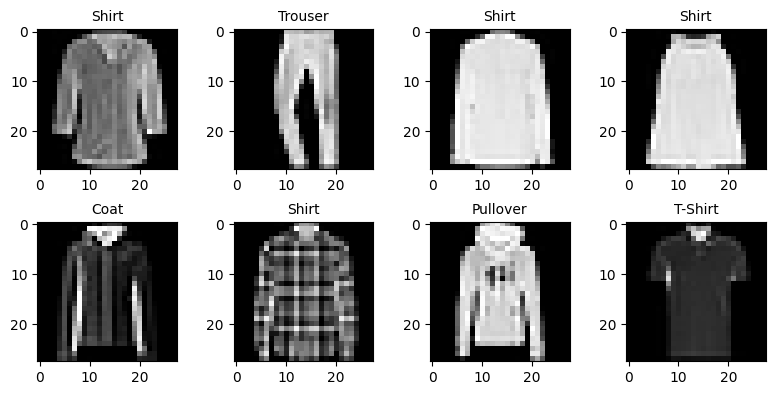

In [62]:
data1 = next(data1_iter)
data2 = next(data2_iter)

fig, ax = plt.subplots(2, 4, figsize=(8, 4))

ax[0][0].imshow(data1[0][0, 0], cmap='gray')
ax[0][0].set_title(labels_map[data1[1][0].item()], fontsize=10)
ax[0][1].imshow(data1[0][1, 0], cmap='gray')
ax[0][1].set_title(labels_map[data1[1][1].item()], fontsize=10)
ax[1][0].imshow(data1[0][2, 0], cmap='gray')
ax[1][0].set_title(labels_map[data1[1][2].item()], fontsize=10)
ax[1][1].imshow(data1[0][3, 0], cmap='gray')
ax[1][1].set_title(labels_map[data1[1][3].item()], fontsize=10)

ax[0][2].imshow(data2[0][0, 0], cmap='gray')
ax[0][2].set_title(labels_map[data2[1][0].item()], fontsize=10)
ax[0][3].imshow(data2[0][1, 0], cmap='gray')
ax[0][3].set_title(labels_map[data2[1][1].item()], fontsize=10)
ax[1][2].imshow(data2[0][2, 0], cmap='gray')
ax[1][2].set_title(labels_map[data2[1][2].item()], fontsize=10)
ax[1][3].imshow(data2[0][3, 0], cmap='gray')
ax[1][3].set_title(labels_map[data2[1][3].item()], fontsize=10)

plt.tight_layout()
plt.show()

---

## Visualize results

### Run after training the models

    Plotting whole logs with best scores and epochs.

    Logs are clipped 0 to 10 for better interpretation.

A2GradExp: Min score: 1.426, Min epoch: 299
A2GradInc: Min score: 0.318, Min epoch: 297
A2GradUni: Min score: 0.838, Min epoch: 297
AccSGD: Min score: 0.006, Min epoch: 272
AdaBelief: Min score: 0.031, Min epoch: 292
AdaBound: Min score: 0.316, Min epoch: 299
AdaMod: Min score: 0.051, Min epoch: 178
AdamP: Min score: 0.255, Min epoch: 83
AggMo: Min score: 0.094, Min epoch: 297
Apollo: Min score: 0.012, Min epoch: 297
DiffGrad: Min score: 0.023, Min epoch: 273
LARS: Min score: 0.008, Min epoch: 293
MADGRAD: Min score: 0.020, Min epoch: 292
NovoGrad: Min score: 0.021, Min epoch: 207
PID: Min score: 0.007, Min epoch: 257
QHAdam: Min score: 0.355, Min epoch: 110
QHM: Min score: 0.007, Min epoch: 293
RAdam: Min score: 0.055, Min epoch: 230
Ranger: Min score: 0.049, Min epoch: 67
RangerQH: Min score: 0.062, Min epoch: 209
RangerVA: Min score: 0.002, Min epoch: 240
SGDP: Min score: 0.005, Min epoch: 266
SGDW: Min score: 0.005, Min epoch: 272
SWATS: Min score: 0.007, Min epoch: 291
Yogi: Min s

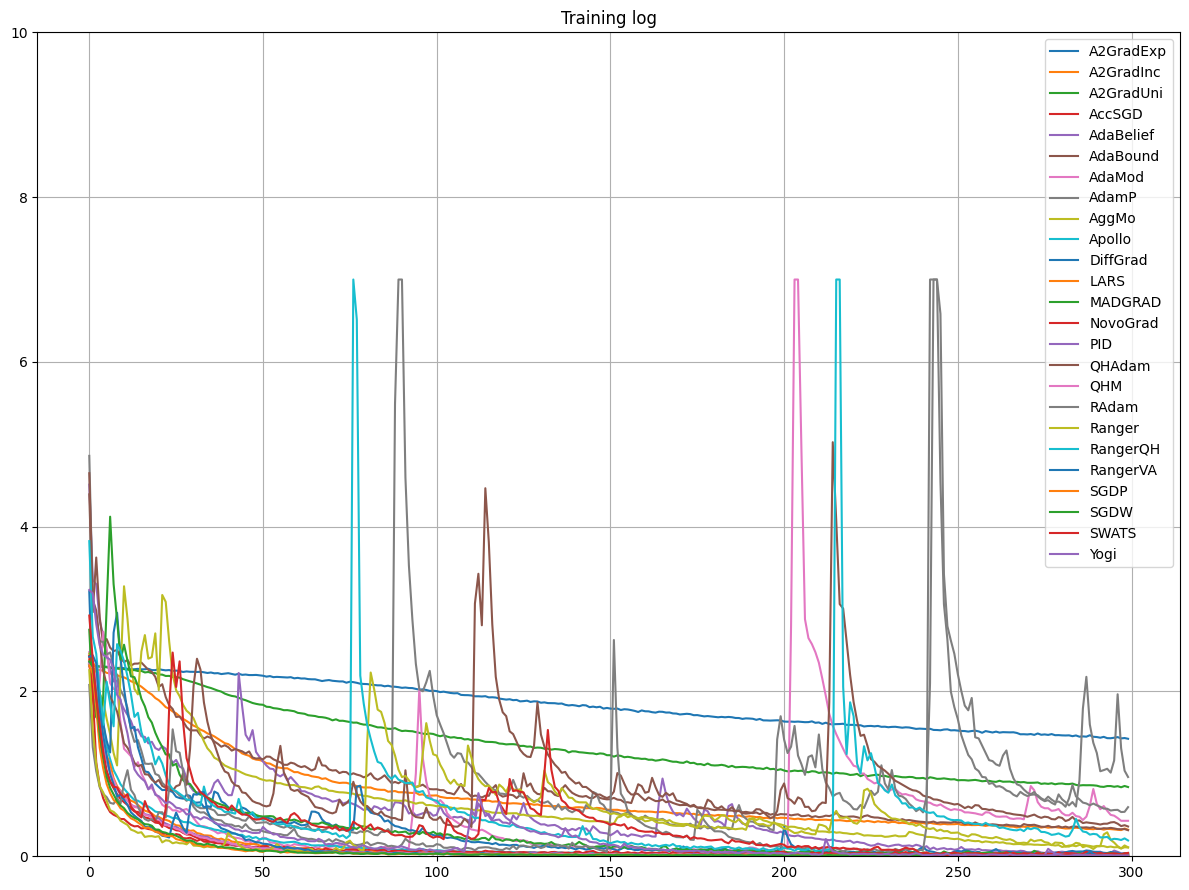

In [97]:
folders = sorted(os.listdir("weights"))

optims, train_idx, train_scores = [], [], []

plt.figure(figsize=(12, 9))

for folder in folders:
    ckpt_path = f"weights/{folder}/ckpt/model_last.pth"
    
    try:
        data = torch.load(ckpt_path, map_location=torch.device("cpu"))
        plt.plot(torch.clip(data['train_log'], 0, 7).tolist(), label=folder)
        
        min_idx = torch.argmin(data['train_log'])
        min_score = data['train_log'][min_idx]

        print(f"{folder}: Min score: {min_score:.3f}, Min epoch: {min_idx}")
        
        optims.append(folder)
        train_idx.append(min_idx)
        train_scores.append(min_score)
    except:
        pass
    
plt.ylim([0, 10])
plt.title("Training log")
    
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

A2GradExp: Min score: 1.473, Min epoch: 298
A2GradInc: Min score: 0.490, Min epoch: 299
A2GradUni: Min score: 0.811, Min epoch: 299
AccSGD: Min score: 0.510, Min epoch: 21
AdaBelief: Min score: 0.404, Min epoch: 192
AdaBound: Min score: 0.465, Min epoch: 290
AdaMod: Min score: 0.449, Min epoch: 113
AdamP: Min score: 0.445, Min epoch: 171
AggMo: Min score: 0.544, Min epoch: 197
Apollo: Min score: 0.527, Min epoch: 35
DiffGrad: Min score: 0.433, Min epoch: 92
LARS: Min score: 0.507, Min epoch: 24
MADGRAD: Min score: 0.446, Min epoch: 73
NovoGrad: Min score: 0.456, Min epoch: 15
PID: Min score: 0.527, Min epoch: 24
QHAdam: Min score: 0.431, Min epoch: 290
QHM: Min score: 0.500, Min epoch: 23
RAdam: Min score: 0.472, Min epoch: 18
Ranger: Min score: 0.438, Min epoch: 245
RangerQH: Min score: 0.462, Min epoch: 269
RangerVA: Min score: 0.418, Min epoch: 36
SGDP: Min score: 0.475, Min epoch: 19
SGDW: Min score: 0.478, Min epoch: 20
SWATS: Min score: 0.435, Min epoch: 105
Yogi: Min score: 0.40

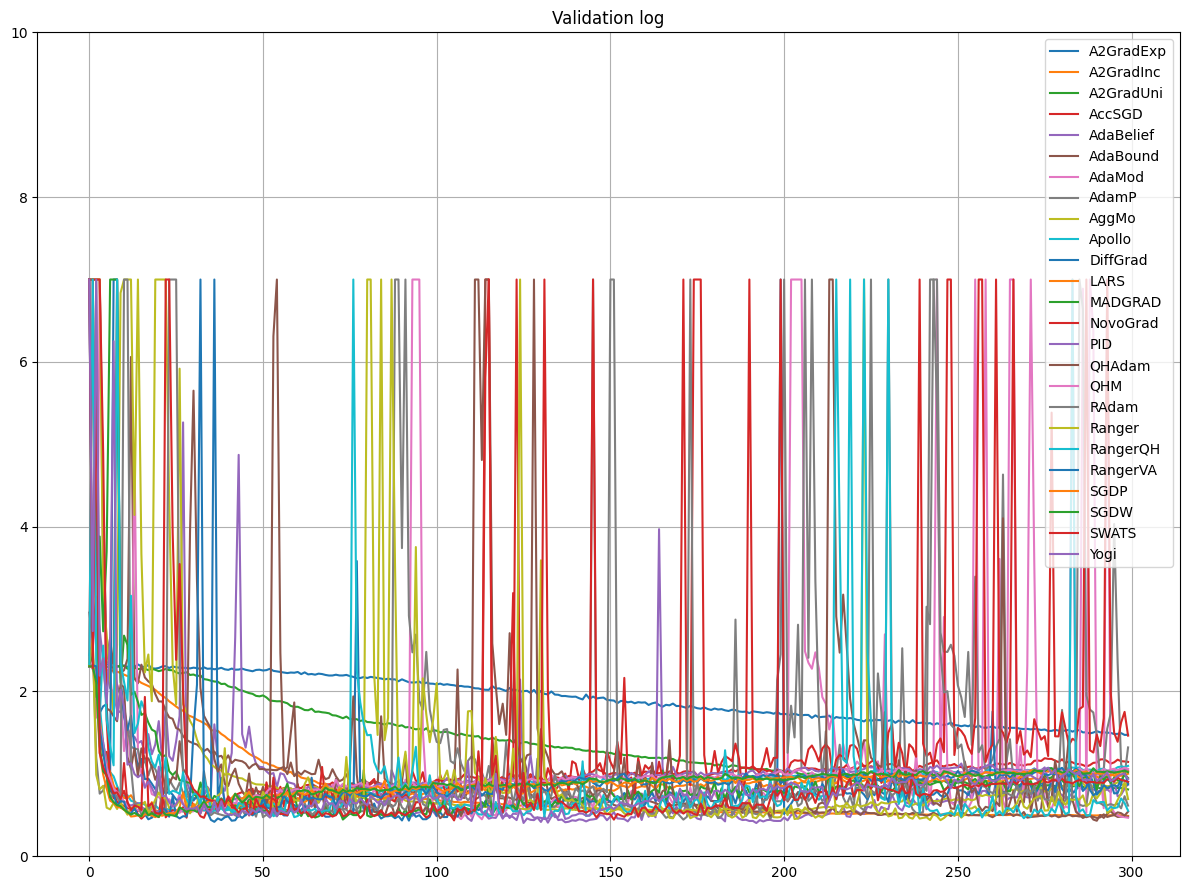

In [100]:
folders = sorted(os.listdir("weights"))

optims, val_idx, val_scores = [], [], []

plt.figure(figsize=(12, 9))

for folder in folders:
    ckpt_path = f"weights/{folder}/ckpt/model_last.pth"
    
    try:
        data = torch.load(ckpt_path, map_location=torch.device("cpu"))
        plt.plot(torch.clip(data['val_log'], 0, 7).tolist(), label=folder)
        
        min_idx = torch.argmin(data['val_log'])
        min_score = data['val_log'][min_idx]

        print(f"{folder}: Min score: {min_score:.3f}, Min epoch: {min_idx}")
        
        optims.append(folder)
        val_idx.append(min_idx)
        val_scores.append(min_score)
    except:
        pass
    
plt.ylim([0, 10])
plt.title("Validation log")
    
plt.legend(loc="upper right")
plt.grid()
plt.tight_layout()
plt.show()

### Scatter plot

    Validation set 기준으로 얼마나 수렴이 빠르고 성능이 좋은지 판단하기 위한 scatter plot 입니다.

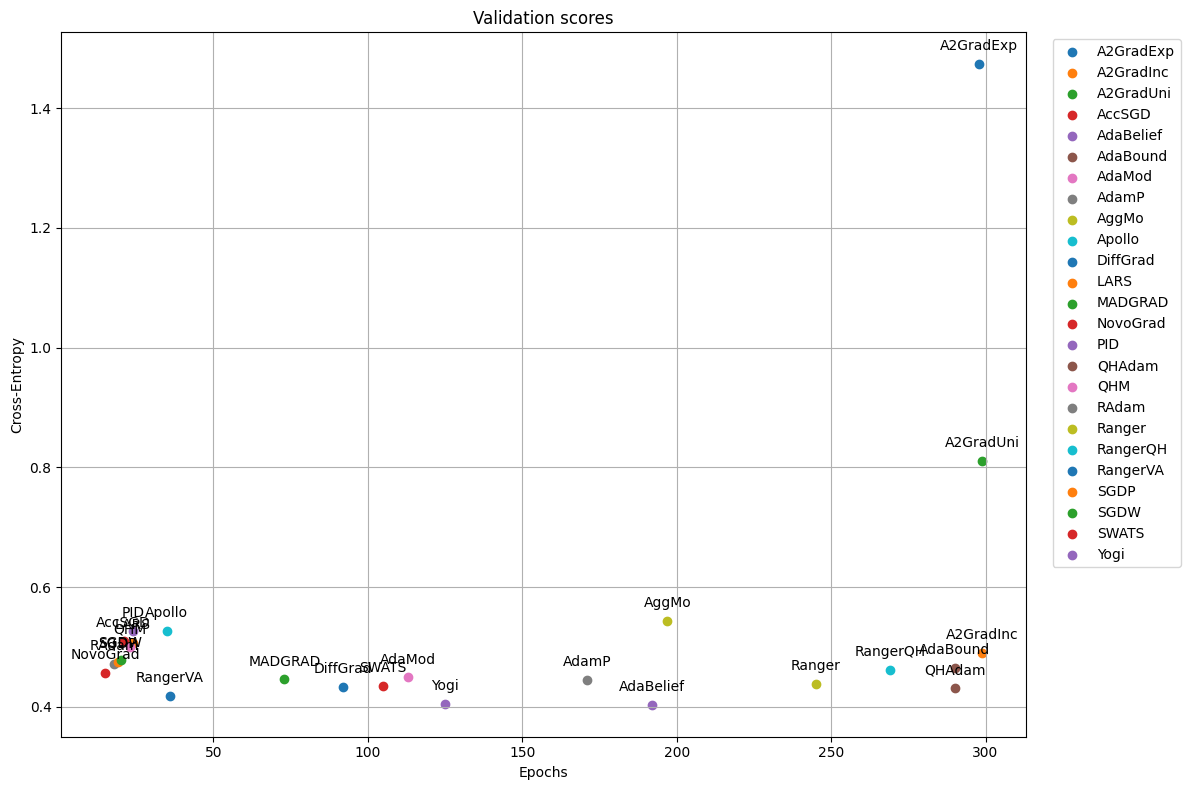

In [64]:
plt.figure(figsize=(12, 8))

# 각 옵티마이저에 대한 점 그리기
for opt, x, y in zip(optims, idx, scores):
    plt.scatter(x=x, y=y, label=opt)

# 각 점에 라벨 추가
for opt, x, y in zip(optims, idx, scores):
    plt.annotate(opt, (x, y), textcoords="offset points", xytext=(0,10), ha='center')

# 범례를 그림 밖으로 이동
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

plt.xlabel("Epochs")
plt.ylabel("Cross-Entropy")

plt.title("Validation scores")

plt.grid()
plt.tight_layout()
plt.show()

    좌측 하단의 scatter를 확대하여 출력

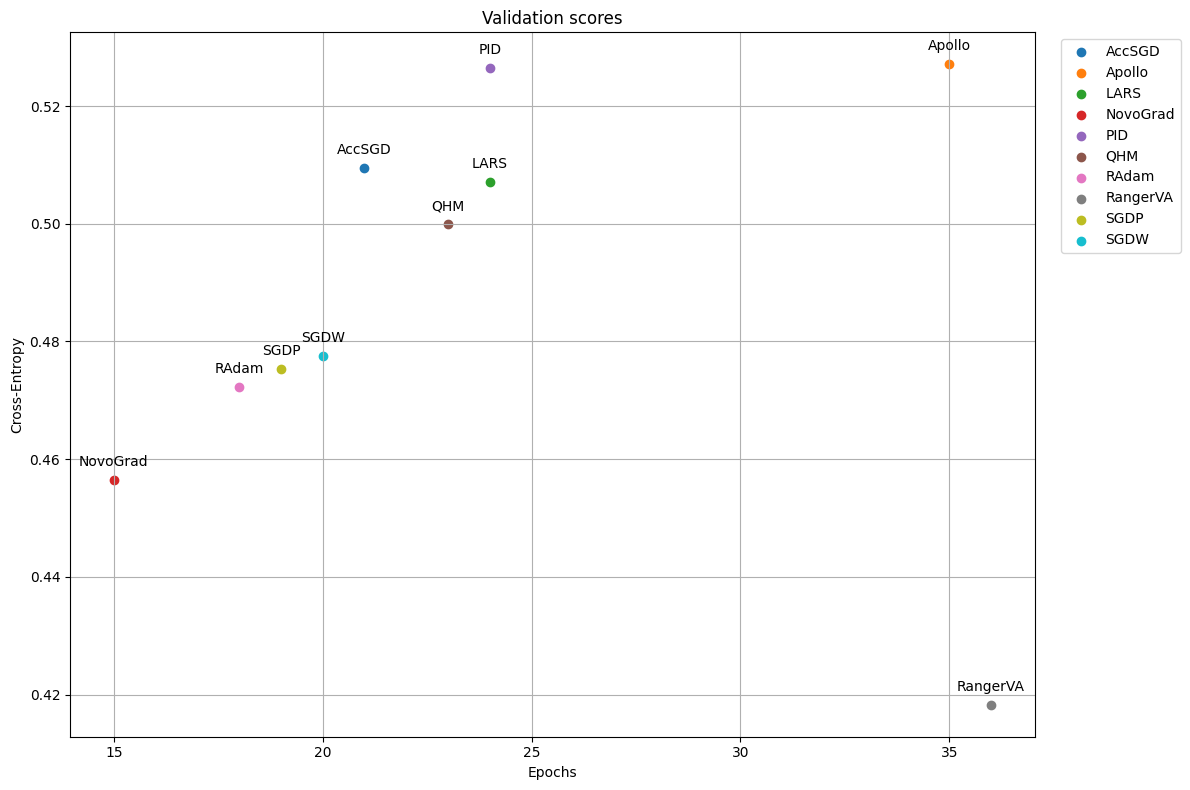

In [71]:
plt.figure(figsize=(12, 8))

# 각 옵티마이저에 대한 점 그리기
for opt, x, y in zip(optims, idx, scores):
    if x < 50:
        plt.scatter(x=x, y=y, label=opt)

# 각 점에 라벨 추가
for opt, x, y in zip(optims, idx, scores):
    if x < 50:
        plt.annotate(opt, (x, y), textcoords="offset points", xytext=(0,10), ha='center')

# 범례를 그림 밖으로 이동
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

plt.xlabel("Epochs")
plt.ylabel("Cross-Entropy")

plt.title("Validation scores")

plt.grid()
plt.tight_layout()
plt.show()

    Train log를 기준으로 plotting한 scatter

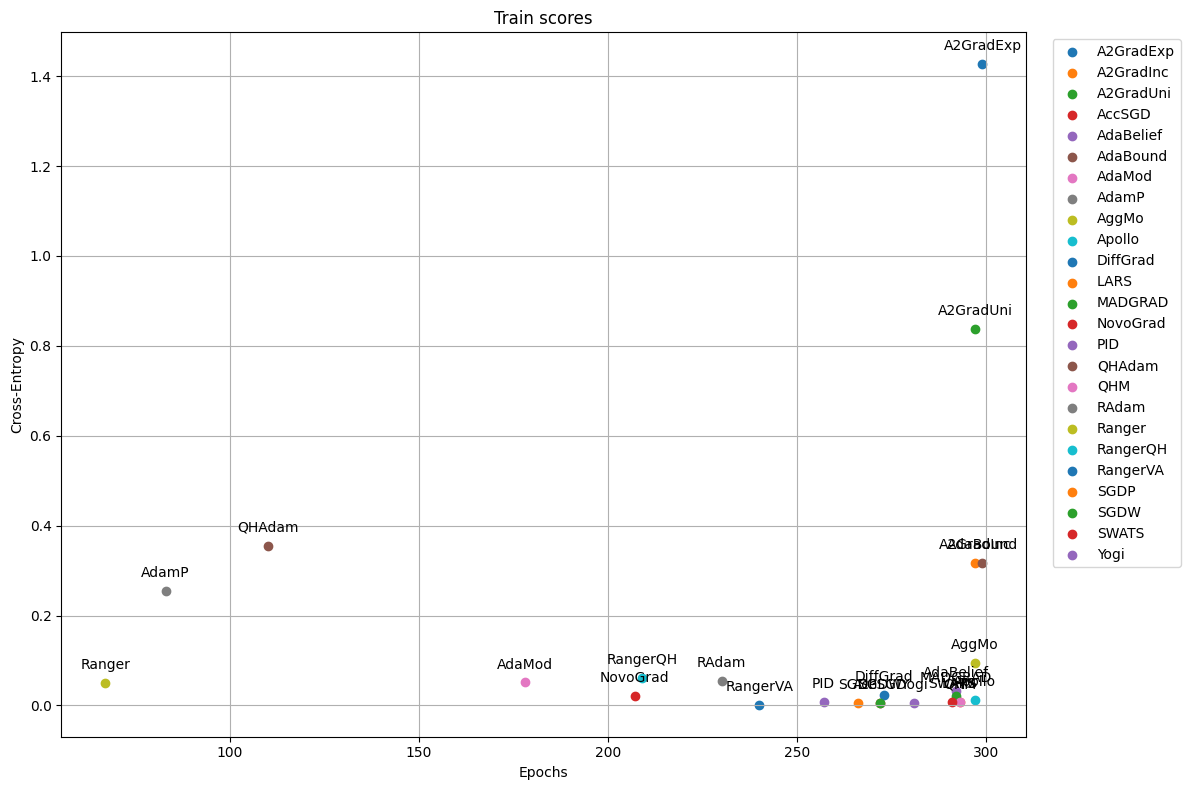

In [70]:
plt.figure(figsize=(12, 8))

# 각 옵티마이저에 대한 점 그리기
for opt, x, y in zip(optims, train_idx, train_scores):
    plt.scatter(x=x, y=y, label=opt)

# 각 점에 라벨 추가
for opt, x, y in zip(optims, train_idx, train_scores):
    plt.annotate(opt, (x, y), textcoords="offset points", xytext=(0,10), ha='center')

# 범례를 그림 밖으로 이동
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

plt.xlabel("Epochs")
plt.ylabel("Cross-Entropy")

plt.title("Train scores")

plt.grid()
plt.tight_layout()
plt.show()

### Category 별로 따로 plotting 진행

    기본 최적화 알고리즘:
    SGD (Stochastic Gradient Descent)
    SGDP
    SGDW

    Adaptive Moment Estimation (Adam) 기반의 알고리즘:
    AdaBelief
    AdaMod
    AdamP
    NovoGrad
    RAdam
    Ranger
    RangerQH
    RangerVA

    Adaptive Gradient Methods 기반의 알고리즘:
    A2GradExp
    A2GradInc
    A2GradUni
    DiffGrad
    MADGRAD
    PID
    QHAdam
    QHM

    새로운 변형 알고리즘:
    AggMo
    Apollo
    SWATS
    Yogi

SGDP: Min score: 0.475, Min epoch: 19
SGDW: Min score: 0.478, Min epoch: 20


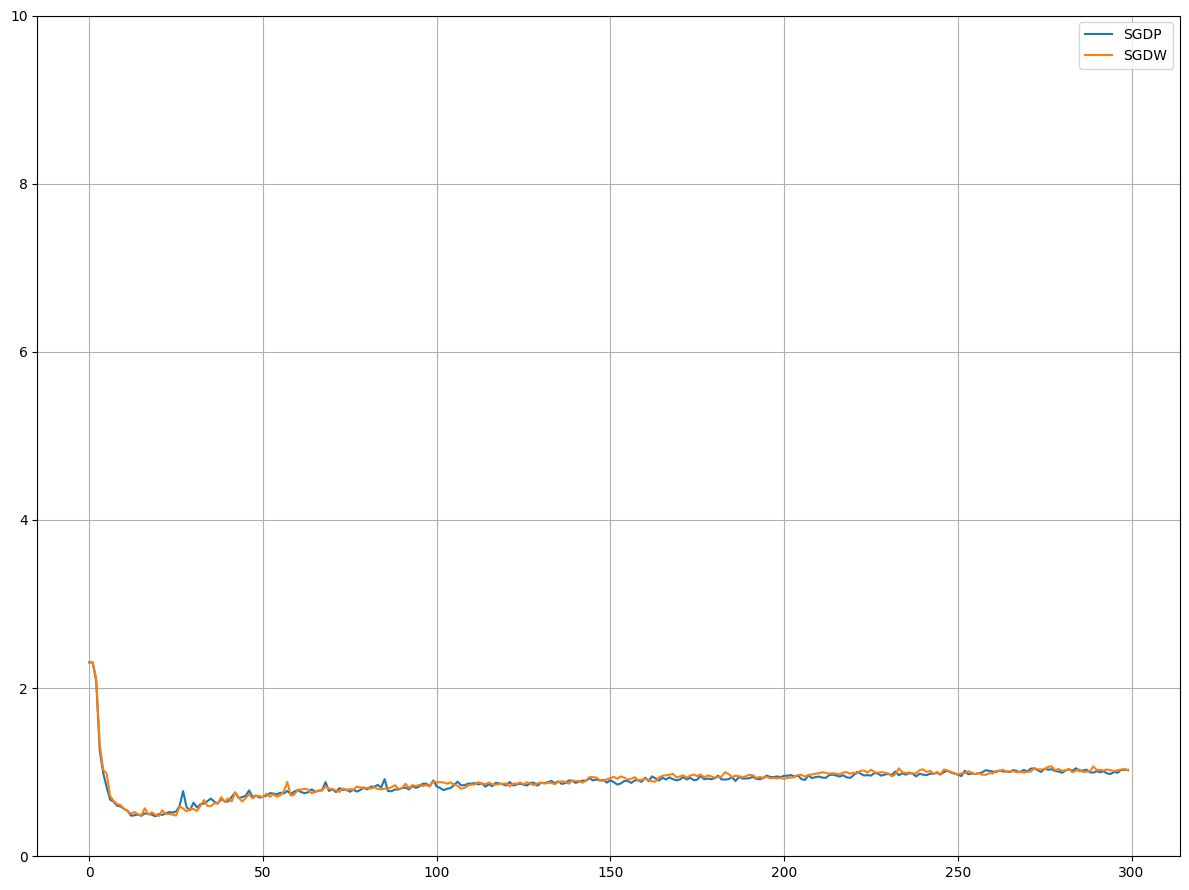

In [41]:
folders = ["SGDP", "SGDW"]

plt.figure(figsize=(12, 9))

for folder in folders:
    ckpt_path = f"weights/{folder}/ckpt/model_last.pth"
    
    try:
        data = torch.load(ckpt_path, map_location=torch.device("cpu"))
        plt.plot(torch.clip(data['val_log'], 0, 7).tolist(), label=folder)
        
        min_idx = torch.argmin(data['val_log'])
        min_score = data['val_log'][min_idx]

        print(f"{folder}: Min score: {min_score:.3f}, Min epoch: {min_idx}")
    except:
        pass
    
plt.ylim([0, 10])
    
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

AdaBelief: Min score: 0.404, Min epoch: 192
AdaMod: Min score: 0.449, Min epoch: 113
AdamP: Min score: 0.445, Min epoch: 171
NovoGrad: Min score: 0.456, Min epoch: 15
RAdam: Min score: 0.472, Min epoch: 18
Ranger: Min score: 0.438, Min epoch: 245
RangerQH: Min score: 0.462, Min epoch: 269
RangerVA: Min score: 0.418, Min epoch: 36


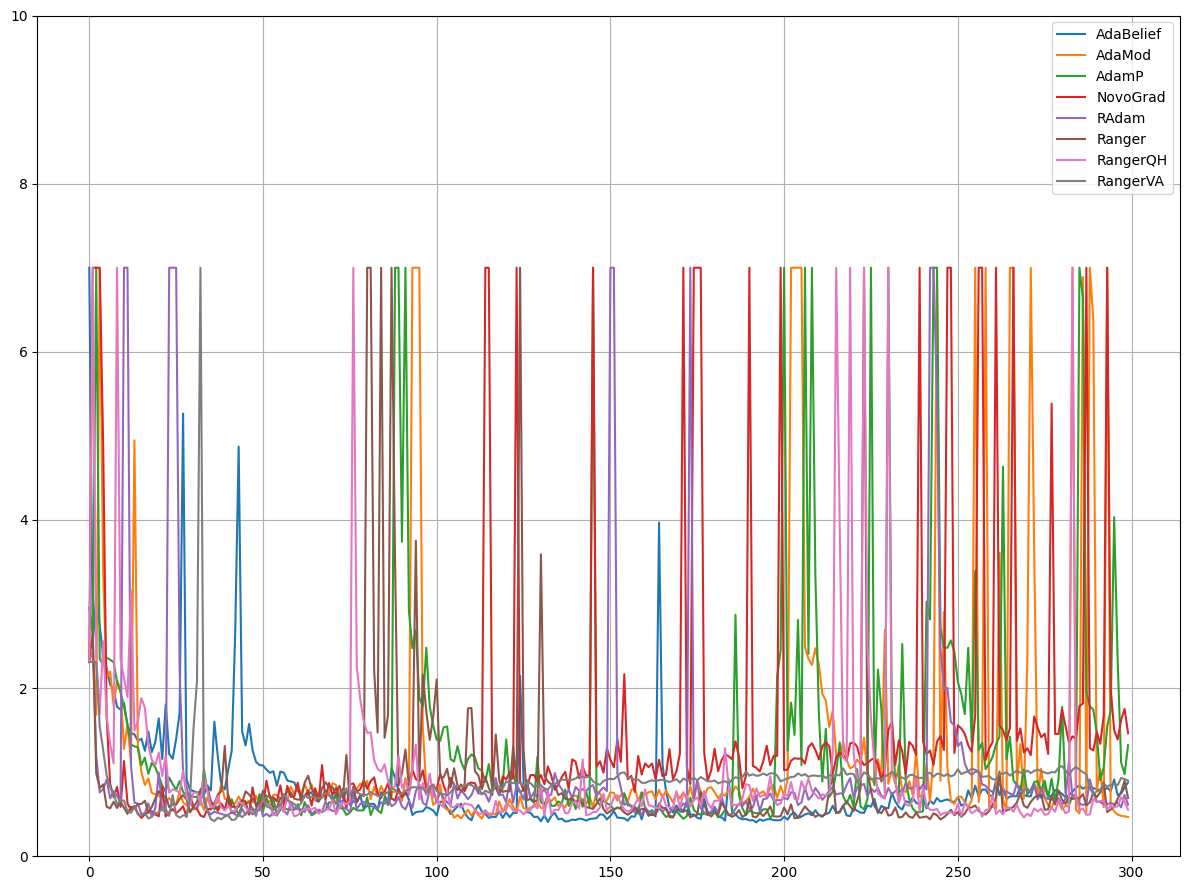

In [38]:
folders = ["Adam",
        "AdaBelief",
        "AdaMod",
        "AdamP",
        "NovoGrad",
        "RAdam",
        "Ranger",
        "RangerQH",
        "RangerVA",]

plt.figure(figsize=(12, 9))

for folder in folders:
    ckpt_path = f"weights/{folder}/ckpt/model_last.pth"
    
    try:
        data = torch.load(ckpt_path, map_location=torch.device("cpu"))
        plt.plot(torch.clip(data['val_log'], 0, 7).tolist(), label=folder)
        
        min_idx = torch.argmin(data['val_log'])
        min_score = data['val_log'][min_idx]

        print(f"{folder}: Min score: {min_score:.3f}, Min epoch: {min_idx}")
    except:
        pass
    
plt.ylim([0, 10])
    
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

A2GradExp: Min score: 1.473, Min epoch: 298
A2GradInc: Min score: 0.490, Min epoch: 299
A2GradUni: Min score: 0.811, Min epoch: 299
DiffGrad: Min score: 0.433, Min epoch: 92
MADGRAD: Min score: 0.446, Min epoch: 73
PID: Min score: 0.527, Min epoch: 24
QHAdam: Min score: 0.431, Min epoch: 290
QHM: Min score: 0.500, Min epoch: 23


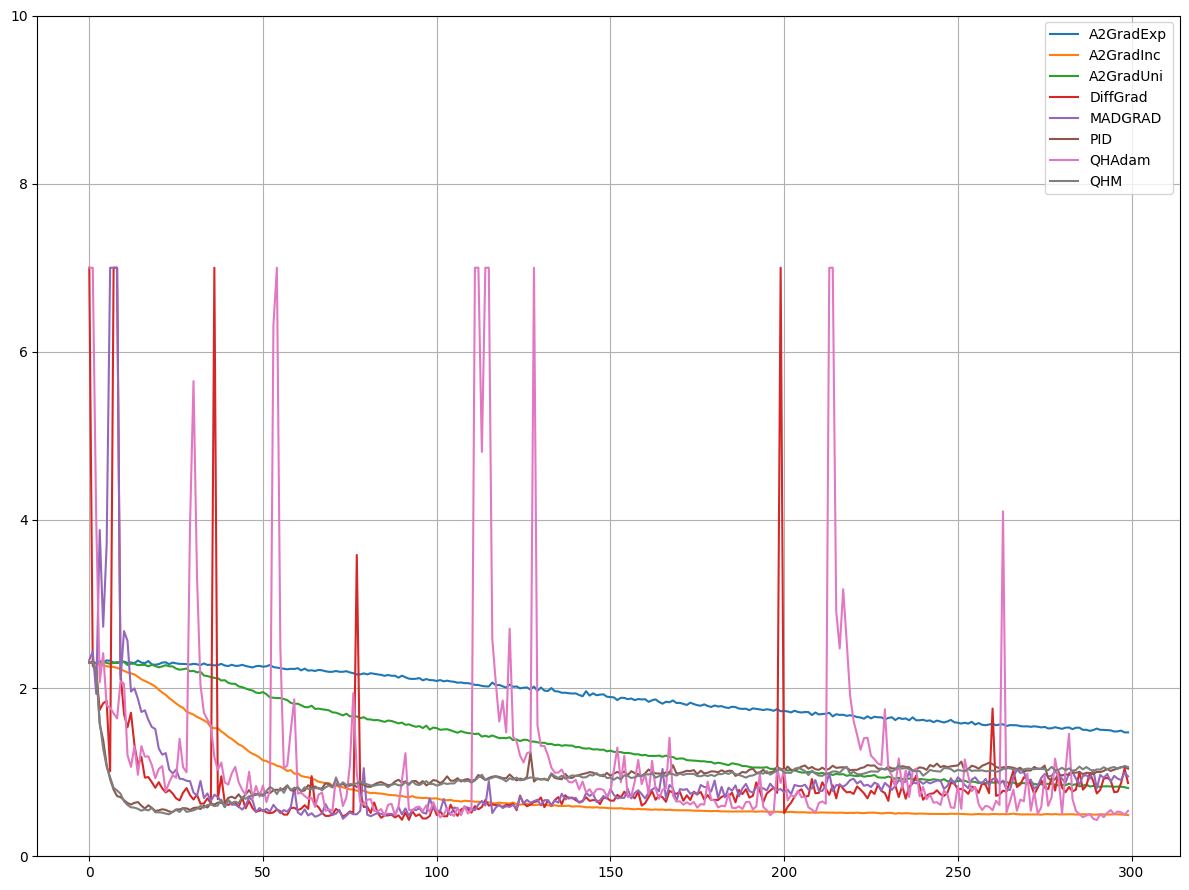

In [37]:
folders = ["A2GradExp",
        "A2GradInc",
        "A2GradUni",
        "DiffGrad",
        "MADGRAD",
        "PID",
        "QHAdam",
        "QHM",]

plt.figure(figsize=(12, 9))

for folder in folders:
    ckpt_path = f"weights/{folder}/ckpt/model_last.pth"
    
    try:
        data = torch.load(ckpt_path, map_location=torch.device("cpu"))
        plt.plot(torch.clip(data['val_log'], 0, 7).tolist(), label=folder)
        
        min_idx = torch.argmin(data['val_log'])
        min_score = data['val_log'][min_idx]

        print(f"{folder}: Min score: {min_score:.3f}, Min epoch: {min_idx}")
    except:
        pass
    
plt.ylim([0, 10])
    
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

AggMo: Min score: 0.544, Min epoch: 197
Apollo: Min score: 0.527, Min epoch: 35
SWATS: Min score: 0.435, Min epoch: 105
Yogi: Min score: 0.404, Min epoch: 125


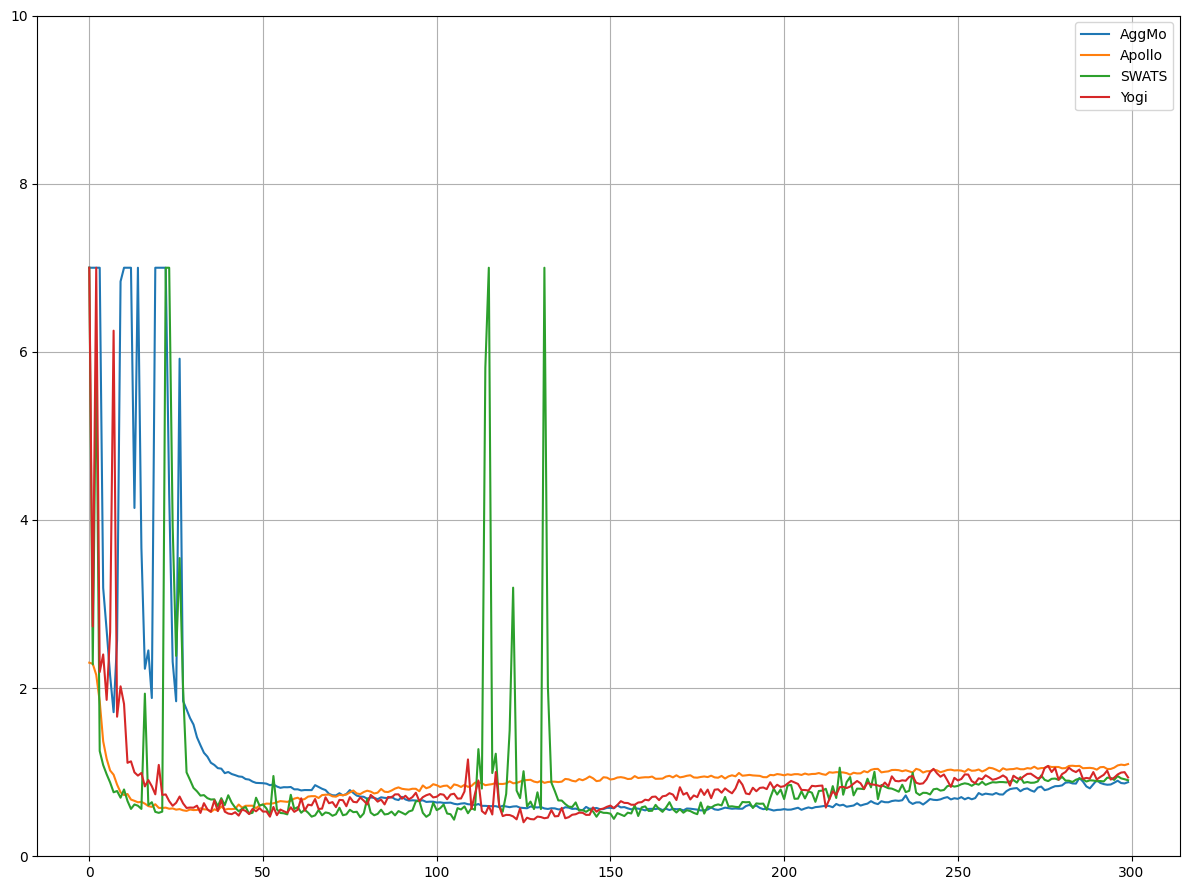

In [40]:
folders = ["AggMo",
        "Apollo",
        "SWATS",
        "Yogi"]

plt.figure(figsize=(12, 9))

for folder in folders:
    ckpt_path = f"weights/{folder}/ckpt/model_last.pth"
    
    try:
        data = torch.load(ckpt_path, map_location=torch.device("cpu"))
        plt.plot(torch.clip(data['val_log'], 0, 7).tolist(), label=folder)
        
        min_idx = torch.argmin(data['val_log'])
        min_score = data['val_log'][min_idx]

        print(f"{folder}: Min score: {min_score:.3f}, Min epoch: {min_idx}")
    except:
        pass
    
plt.ylim([0, 10])
    
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()